<a href="https://colab.research.google.com/github/DuckofDoom91/Portfolio/blob/main/We_Rate_Dogs_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We Rate Dogs Twitter Analysis

In [ ]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
archive = pd.read_csv('twitter_archive_master.csv')
pred = pd.read_csv('image_pred_master.csv')

In [ ]:
#datetime didn't stay when the .csv file was saved. Easy as a copy/paste to fix.
archive.timestamp = pd.to_datetime(archive.timestamp)
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1665 non-null   int64              
 1   timestamp           1665 non-null   datetime64[ns, UTC]
 2   source              1665 non-null   object             
 3   text                1665 non-null   object             
 4   rating_numerator    1665 non-null   int64              
 5   rating_denominator  1665 non-null   int64              
 6   name                1185 non-null   object             
 7   dog_stage           284 non-null    object             
 8   retweet_count       1665 non-null   int64              
 9   favorite_count      1665 non-null   int64              
 10  breeds              1665 non-null   object             
 11  confidence          1665 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(6

In [ ]:
archive.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,breeds,confidence
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,6514,33819,Chihuahua,32
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,4328,25461,Chihuahua,71
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,8964,42908,Labrador_retriever,16
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,9774,41048,basset,55
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,NaN,NaN,3261,20562,Chesapeake_Bay_retriever,42


# Question 1: Is there a dominant dog stage?

In [ ]:
dog_stage = archive.dog_stage.value_counts()
dog_stage

pupper     161
doggo       60
puppo       24
puppers     15
Pupper       5
doggos       4
Floofer      4
floofer      3
Doggo        3
PUPPER       3
Puppo        1
puppos       1
Name: dog_stage, dtype: int64

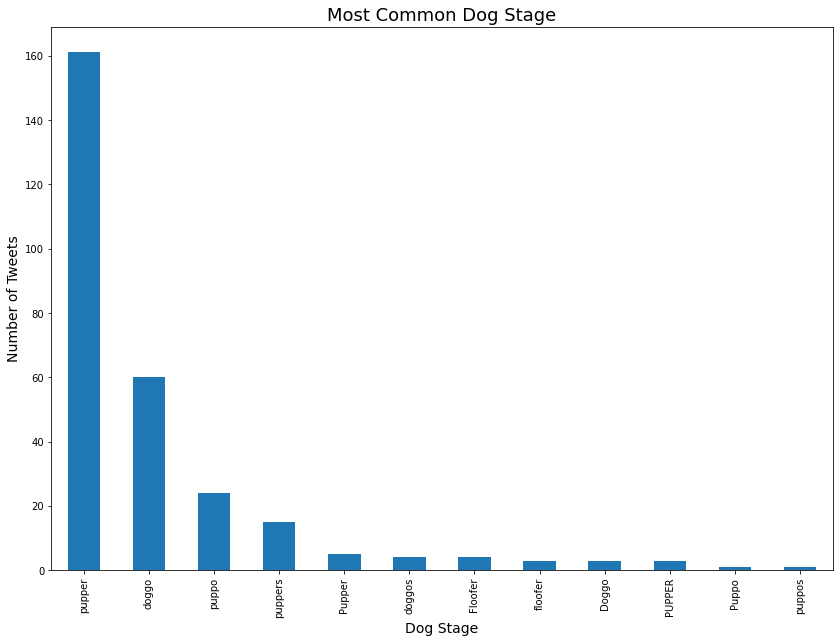

In [ ]:
dog_stage.plot(kind = 'bar', figsize = (14, 10))
plt.title('Most Common Dog Stage', fontsize = 18)
plt.xlabel('Dog Stage', fontsize = 14)
plt.ylabel('Number of Tweets', fontsize = 14);

### Answer: Even with multiple variations of the same stage, we can see that "pupper" wins in every variation.

# Question 2: Do more people Retweet or Favorite these tweets?

In [ ]:
favorite = archive.favorite_count.sum()
retweet = archive.retweet_count.sum()
print("Favorite Count:", favorite, "Retweet Count:", retweet)
#Favorite wins by a landslide.

Favorite Count: 15468188 Retweet Count: 4720505


### Does this change over time?

In [ ]:
monthly_fave = archive.groupby(archive['timestamp'].dt.to_period('M'))['favorite_count'].mean()

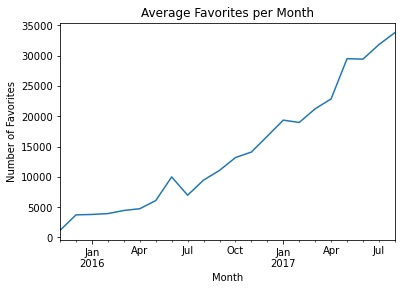

In [ ]:
monthly_fave.plot()
plt.title('Average Favorites per Month')
plt.xlabel('Month')
plt.ylabel('Number of Favorites');

In [ ]:
monthly_rt = archive.groupby(archive['timestamp'].dt.to_period('M'))['retweet_count'].mean()

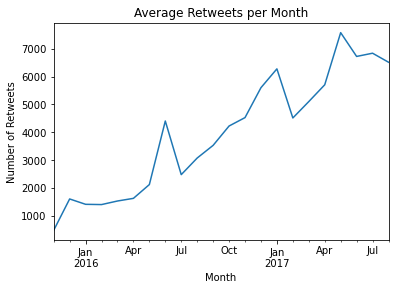

In [ ]:
monthly_rt.plot()
plt.title('Average Retweets per Month')
plt.xlabel('Month')
plt.ylabel('Number of Retweets');

### We can see that engagment with the account grew over time for both retweets and favorites.

## Question 3 What are the most favorited and retweeded tweets?

In [ ]:
#The Most Favorited
archive.sort_values(by = 'favorite_count', ascending = False).head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,breeds,confidence
275,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13,10,NaN,puppo,48265,132810,Lakeland_terrier,19


#### Answer: "Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10"

In [ ]:
#The Most Retweeted
archive.sort_values(by = 'retweet_count', ascending = False).head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,breeds,confidence
685,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13,10,NaN,doggo,79515,131075,Labrador_retriever,82


### Answer: Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)

## Question # 4 What are the top 10 dog names?

In [ ]:
top_10_d = archive.name.value_counts().head(10)
top_10_d = top_10_d.sort_values(ascending = True)

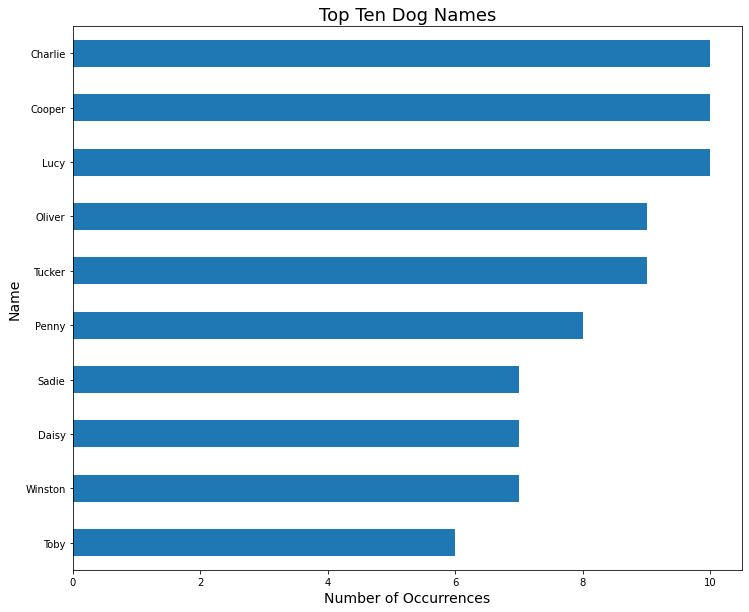

In [ ]:
top_10_d.plot(kind='barh', figsize=(12, 10))
plt.title('Top Ten Dog Names', fontsize=18)
plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('Name', fontsize=14);

### Charlie and Lucy are tied for the Top Ten at 11 counts each.

## Question 5: According to the neural network built by Udacity instructors, what was the top dog breed listed?

In [ ]:
top_10_b = archive.breeds.value_counts().head(10)
top_10_b = top_10_b.sort_values(ascending = True)

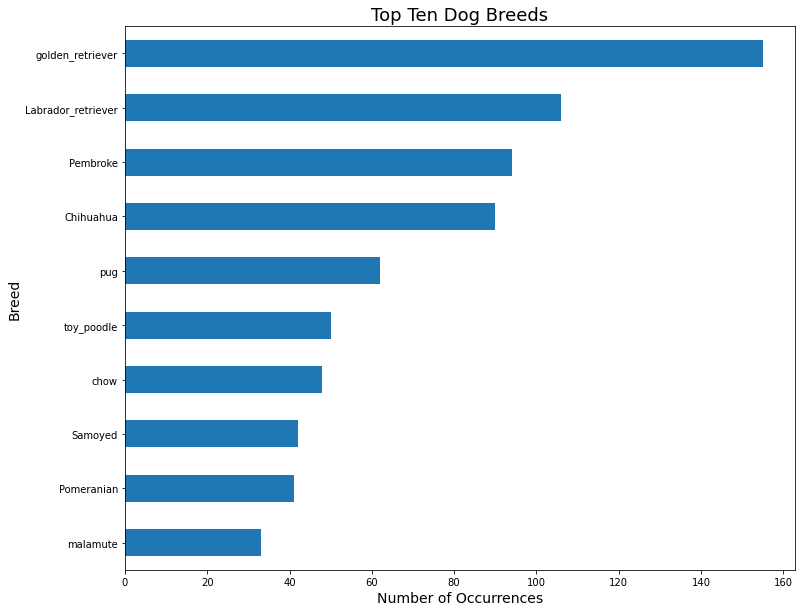

In [ ]:
##Top 10 Breeds
top_10_b.plot(kind='barh', figsize=(12, 10))
yaxis={'categoryorder':'total ascending'}
plt.title('Top Ten Dog Breeds', fontsize=18)
plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('Breed', fontsize=14);

### As suspected, the top dogs are golden and labrador retrievers.